A time-series data can be broken into the four following components:

1. Trend Component : Trend is the consistent long-term upward or downward movement of the data.

2. Seasonal Component : Seasonal component (measured using seasonality index) is the repetitive upward or downward movement (or fluctuations) from the trend that occurs within a calendar year at fixed intervals (i.e., time between seasons is fixed) such as seasons, quarters, months, days of the week, etc. The upward or downward fluctuation may be caused due to festivals, customs within a society, school holidays, business practices within the market such as “end of season sale”, and so on.

3. Cyclical Component : Cyclical component is fluctuation around the trend line at random interval (i.e., the time between cycles is random) that happens due to macro-economic changes such as recession, unemployment, etc. Cyclical fluctuations have repetitive patterns with time between repetitions of more than a year. Whereas in the case of seasonality, the fluctuations are observed within a calendar year and are driven by factors such as festivals and customs that exist in a society. 

A major difference between seasonal fluctuation and cyclical fluctuation is that seasonal fluctuation occurs at fixed period within a calendar year, whereas cyclical fluctuations have random time between fluctuations. That is, the periodicity of seasonal fluctuations is constant, whereas the periodicity of cyclical fluctuations is not constant.

4. Irregular Component : Irregular component is the white noise or random uncorrelated changes that follow a normal distribution with mean value of 0 and constant variance.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
wsb_df = pd.read_csv('Datasets\\wsb.csv')
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


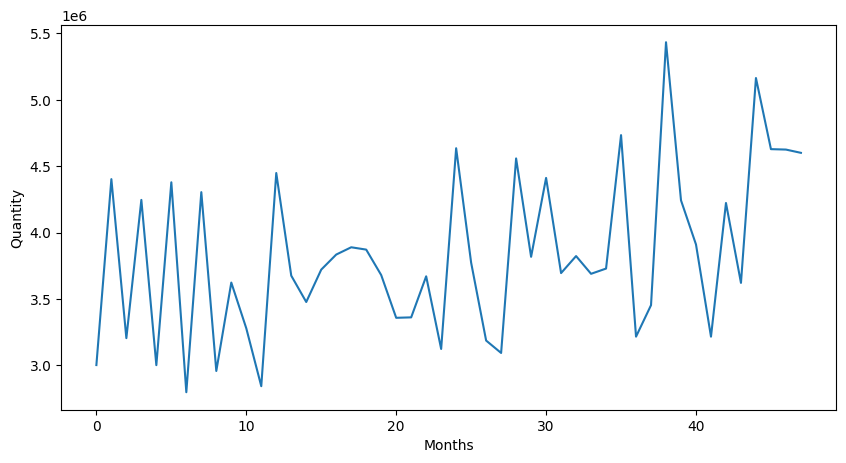

In [7]:
plt.figure(figsize=(10,5))
plt.plot(wsb_df['Sale Quantity'])
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.show()

Pandas has a function rolling() which can be used with an aggregate function like mean() for calculating moving average for a time window. For example, to calculate 12 month’s moving average using last 2 months’ data starting from last month (previous period), rolling() will take a parameter window,which is set to 12 to indicate moving average of 12-months data, and then use Pandas’ shift() function,which takes parameter 1 to specify that the 12-months data should start from last month. 

shift(1) means calculating moving average for the specified window period starting from previous observation (in this
case last month).

In [8]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(
                            window = 12).mean().shift(1)

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


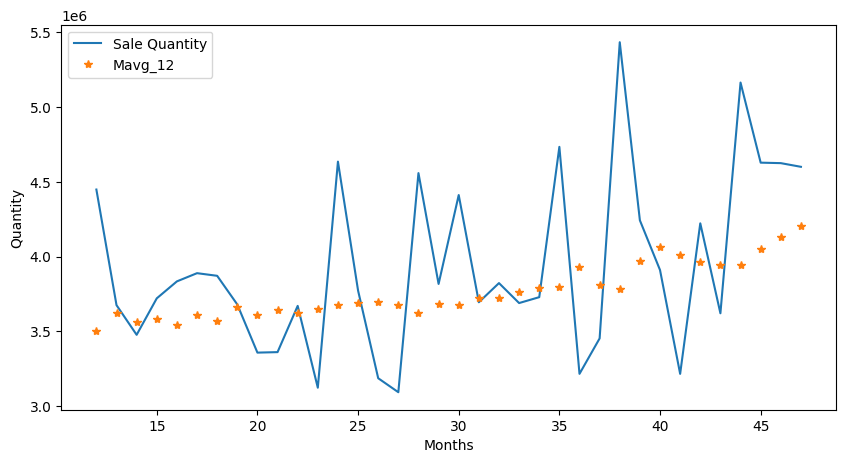

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.plot(wsb_df['Sale Quantity'][12:],label='Sale Quantity');
plt.plot(wsb_df['mavg_12'][12:], '*',label='Mavg_12');
plt.legend(loc='upper left');


Calculating Forecast Accuracy

Root mean square error (RMSE) and mean absolute percentage error (MAPE) are the two most popular accuracy measures of forecasting. 

Mean absolute percentage error (MAPE) is the average of absolute percentage error. Assume that the validation data has n observations and forecasting is carried out on these n observations. 

In [24]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual))
    * 100, 2 )

In [25]:
get_mape( wsb_df['Sale Quantity'][36:],
         wsb_df['mavg_12'][36:])

14.04

Root mean square error (RMSE) is the square root of average of squared error calculated over the validation dataset, and is the standard deviation of the errors for unbiased estimator. 

Lower RMSE implies better prediction. However, it depends on the scale of the time-series data. MSE (Mean Squared Error) can be calculated using mean_squared_error() method in sklearn.metrics. We can pass MSE value to np.sqrt() to calculate RMSE.

In [26]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:],
                           wsb_df['mavg_12'][36:]))

734725.8359239782

Exponential Smoothing

One of the drawbacks of the simple moving average technique is that it gives equal weight to all the previous observations used in forecasting the future value. Exponential smoothing technique (also known as simple exponential smoothing; SES) assigns differential weights to past observations. 

Ft+1=α(Yt)+(1-α)(Ft)

where α is called the smoothing constant, and its value lies between 0 and 1. Ft+1 is the forecasted value at time t + 1 using actual value Yt at time t and forecasted values Ft of time t. But the model applies differential weights to both the inputs using smoothing constant α.

In [27]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm( alpha = 0.2 ).mean()

In [31]:
get_mape(wsb_df[['Sale Quantity']][36:].values,
          wsb_df[['ewm']][36:].values)

11.15

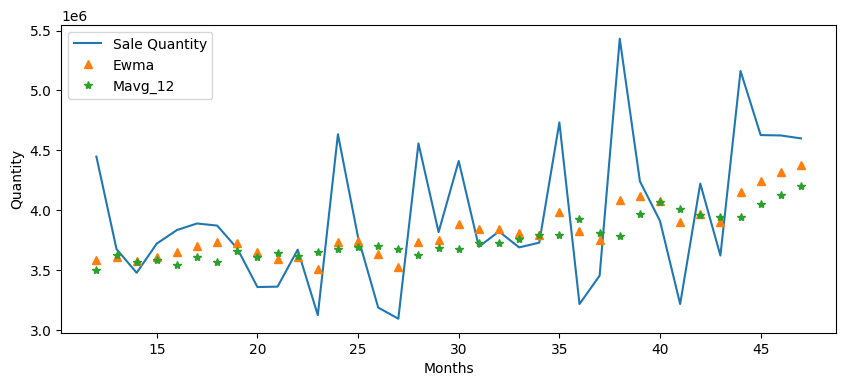

In [32]:
plt.figure( figsize=(10,4))
plt.xlabel( 'Months' )
plt.ylabel( 'Quantity' )
plt.plot( wsb_df['Sale Quantity'][12:] ,label='Sale Quantity');
plt.plot( wsb_df['ewm'][12:], '^',label='Ewma' );
plt.plot( wsb_df['mavg_12'][12:], '*',label='Mavg_12');
plt.legend();

Moving average and simple exponential smoothing (SES) assume a fairly steady time-series data with no significant trend, seasonal or cyclical components, i.e. the data is stationary. However, many dataset will have trend and seasonality.

DECOMPOSING TIME SERIES

The time-series data can be modelled as addition or product of trend,seasonality, cyclical, and irregular
components.
Yt = Tt + St + Ct + It

Additive models are not very common, since in many cases the seasonal component may not be independent of the trend.

Yt = Tt × St × Ct × It

For decomposing a time-series data :

1. statsmodel.tsa provides various features for time-series analysis.
2. seasonal_decompose() in statsmodel.tsa.seasonal decomposes a time series into trend, seasonal,and residuals.


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']),
                                 model='multiplicative',period=12)

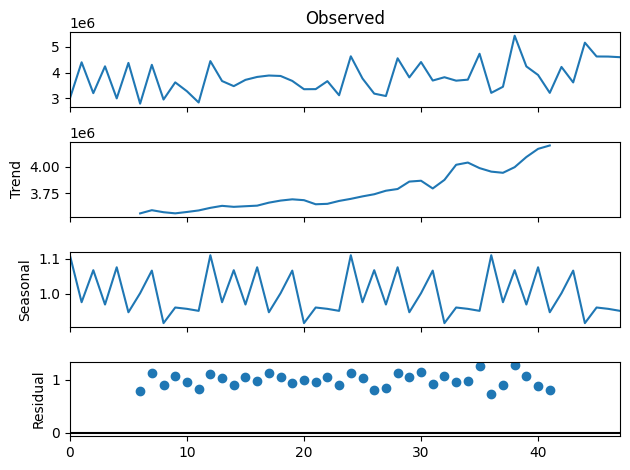

In [38]:
## Plotting the deocomposed time series components
ts_plot = ts_decompose.plot()
wsb_df['seasonal'] = ts_decompose.seasonal
wsb_df['trend'] = ts_decompose.trend

AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE MODELS

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970 ARMA models are basically regression models; auto-regression simply means regression of a variable on itself measured at different time periods.

AR (1): 
Yt+1 = m + bYt + et+1

where et+1 is a sequence of uncorrelated residuals assumed to follow the normal distribution with zero mean and constant standard deviation. 

One of the important tasks in using the AR model in forecasting is model identification,which is, identifying the value of p (the number of lags). 

One of the standard approaches used for model identification is using auto-correlation function (ACF) and partial auto-correlation function (PACF).

ACF

Auto-correlation of lag k is the correlation between Yt and Yt–k measured at different k values (e.g., Yt and Yt−1 or Yt and Yt−2).ACF plot is also called a Correlogram

PACF

Partial auto-correlation of lag k is the correlation between Yt and Yt−k when the influence of all intermediate values (Yt−1, Yt−2, …, Yt−k+1) is removed (partial out) from both Yt and Yt−k.



In [41]:
vimana_df = pd.read_csv('Datasets\\vimana.csv')
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 724.0 bytes


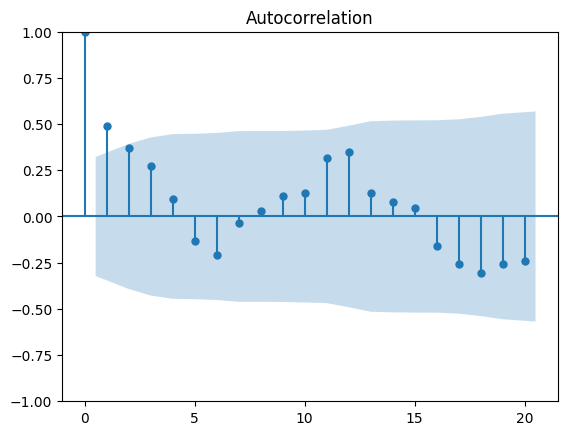

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Show autocorrelation upto lag 20
acf_plot = plot_acf( vimana_df.demand,lags=20)

The shaded area represents the upper and lower bounds for critical values, where the null hypothesis cannot be rejected (auto-correlation value is 0). So, as can be seen from Figure 8.5, null hypothesis is rejected only for lag = 1 (i e., auto-correlation is statistically significant for lag 1).

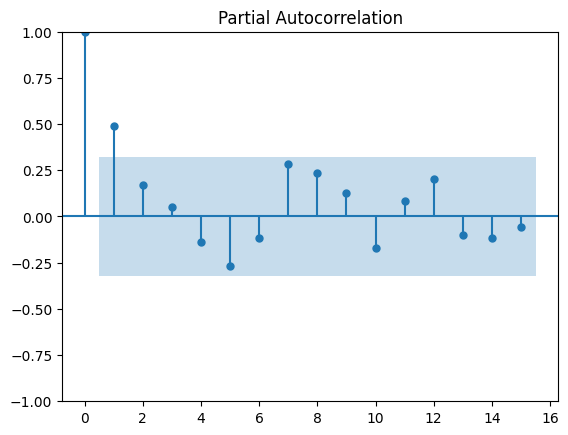

In [44]:
pacf_plot = plot_pacf( vimana_df.demand,lags=15 )

The shaded area represents the upper and lower bounds for critical values, where the null hypothesis cannot be rejected. So, for lag = 1 the partial auto-correlation is significant.

To select the appropriate p in the AR model, the following thumb rule can be used:
1. The partial auto-correlation is significant for first p-values (first p lags) and cuts off to zero.
2. The ACF decreases exponentially. (Signs of stationarity) 

AR Model

1. endog: list of values – It is the endogenous variable of the time series.
2. order: The (p, d, q) – ARIMA model parameters. Order of AR is given by the value p, the order of integration is d, and the order of MA is given by q.

We will set d and q to 0 and use p = 1 for AR(1) model, and we will use only 30 months of data for building the model and forecast the next six months for measuring accuracy

In [47]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64),
              order = (1,0,0))
ar_model = arima.fit()

In [49]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Sat, 28 Oct 2023   AIC                            371.530
Time:                        16:02:14   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model summary indicates the AR with lag 1 is significant variables in the model. The corresponding p-value is less than 0.05 (0.009).

Forecast the demand for the months 31 to 37.

In [50]:
forecast_31_37 = ar_model.predict(30, 36)
forecast_31_37

30   480.15
31   497.71
32   506.01
33   509.93
34   511.78
35   512.66
36   513.07
Name: predicted_mean, dtype: float64

In [51]:
get_mape( vimana_df.demand[30:],forecast_31_37 )

19.12

MA processes are regression models in which the past residuals are used for forecasting future values of the time-series data

Yt+1=aet+et+1

The value of q (number of lags) in a moving average process can be identified using the following rules :

1. Auto-correlation value is significant for first q lags and cuts off to zero.
2. The PACF decreases exponentially

In [55]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64),
              order = (0,0,1))
ma_model = arima.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Sat, 28 Oct 2023   AIC                            374.595
Time:                        16:09:57   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.482      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As per the model summary, moving average with lag 1 is statistically insignificant as the corresponding p-value is more than 0.05. (MA is not zero)

In [56]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape(vimana_df.demand[30:],forecast_31_37 )

17.78

Auto-regressive moving average (ARMA) is a combination auto-regressive and moving average process.
ARMA(p, q) process combines AR(p) and MA(q) processes. 
The values of p and q in an ARMA process can be identified using the following thumb rules:
1. Auto-correlation values are significant for first q values (first q lags) and cuts off to zero.
2. Partial auto-correlation values are significant for first p values and cuts off to zero.



In [58]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64), order = (1,0,1))
arma_model = arima.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Sat, 28 Oct 2023   AIC                            371.692
Time:                        16:12:02   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     59.146      8.595      0.000     392.461     624.308
ar.L1          0.7421      0.316      2.348      0.019       0.123       1.362
ma.L1         -0.3395      0.539     -0.629      0.529      -1.397       0.718
sigma2      1.065e+04   3040.079      3.505      0.000    4696.417    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model summary indicates that moving average with lag 1 is not significant (p-value is more than 0.05), when auto regressive with lag1 is also used in the model. 

In [59]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape(vimana_df.demand[30:],forecast_31_37 )

20.27

Since MA lag is not significant, we will use AR(1) model

ARIMA Model

ARMA models can be used only when the time-series data is stationary. ARIMA models are used when the time-series data is non-stationary.Time-series data is called stationary if the mean, variance, and covariance are constant over time.ARIMA model was proposed by Box and Jenkins (1970) and thus
is also known as Box−Jenkins methodology. ARIMA has the following three components and is represented as ARIMA (p, d, q):

1. AR component with p lags AR(p).
2. Integration component (d).
3. MA with q lags, MA(q).

The main objective of the integration component is to convert a non-stationary time-series process to a stationary process so that the AR and MA processes can be used for forecasting. 

When the data is nonstationary, the ACF will not cut-off to zero quickly; rather ACF may show a very slow decline.

What is Stationary Data?

Time-series data should satisfy the following conditions to be stationary:
1. The mean values of Yt at different values of t are constant.
2. The variances of Yt at different time periods are constant (Homoscedasticity).
3. The covariance of Yt and Yt−k for different lags depend only on k and not on time t

In [61]:
store_df = pd.read_excel('Datasets\\store.xls')
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [62]:
store_df.head()

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


We can convert the column into DateTime index, which is a default input to time-series models. Creating a DataTime index will make sure that the data is ordered by date or time.

In [63]:
store_df.set_index(pd.to_datetime(store_df.Date),inplace=True)
store_df.drop('Date', axis = 1, inplace = True)

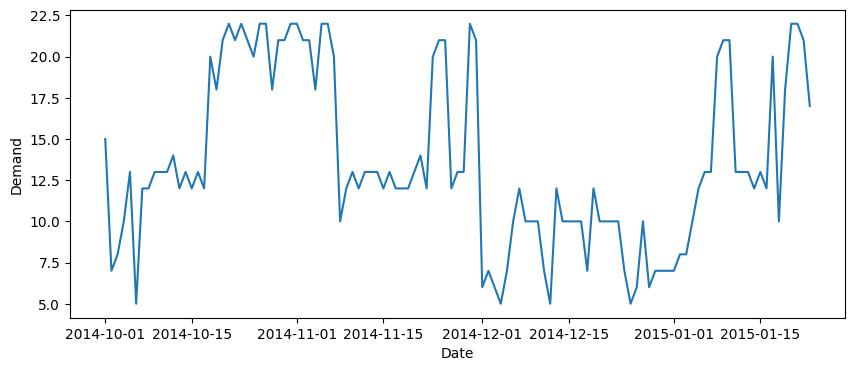

In [64]:
plt.figure( figsize=(10,4))
plt.xlabel( 'Date' )
plt.ylabel( 'Demand' )
plt.plot( store_df.demand );

Now we will draw the ACF plot to verify stationarity of the time series.

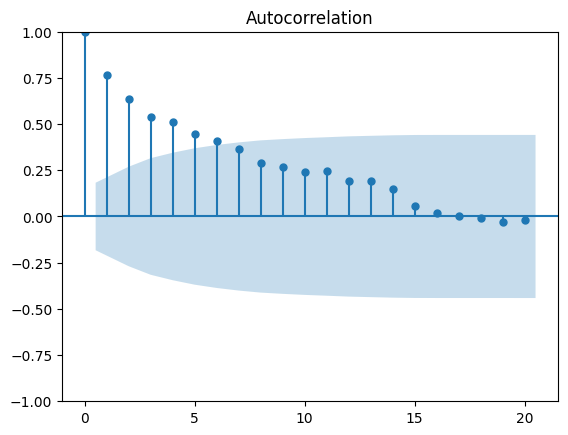

In [65]:
acf_plot = plot_acf( store_df.demand,lags=20 )

The slow decline of auto-correlations for different lags indicates that the series is not stationary

To find out if a time series is stationary, Dickey−Fuller (Dickey and Fuller, 1979) test can also be conducted. Dickey–Fuller test checks whether the b in AR equation is equal to 1 or less than equal to 1.

H0: b = 1 (the time series is non-stationary)

HA: b < 1 (the time series is stationary)

If the p-value is less than 0.05, the time series is stationary.

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic',
                    'p-value','Lags Used','Number of Observations Used'])
    print(adfuller_out)
adfuller_test(store_df.demand)

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


The p-value (>0.05) indicates that we cannot reject the null hypothesis and hence, the series is not stationary.
Differencing the original time series is an usual approach for converting the non-stationary process into a stationary process (called difference stationarity). For example, the first difference (d = 1) is the difference between consecutive values of the time series (Yt). 



In [68]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)
store_df.head(5)

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [69]:
store_diff_df = store_df.dropna()

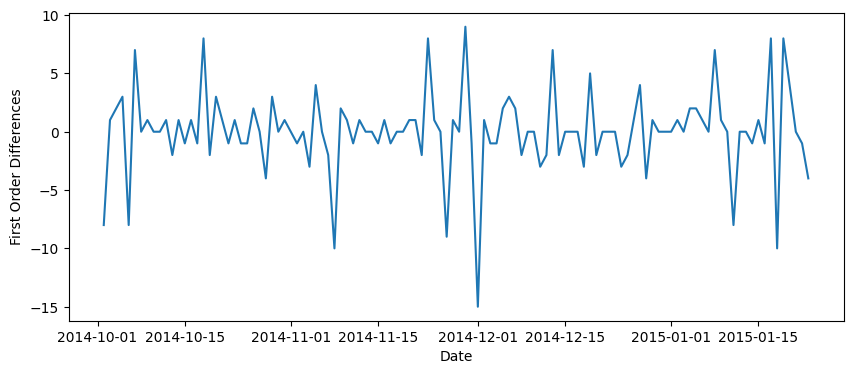

In [70]:
plt.figure(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('First Order Differences')
plt.plot( store_diff_df.demand_diff);

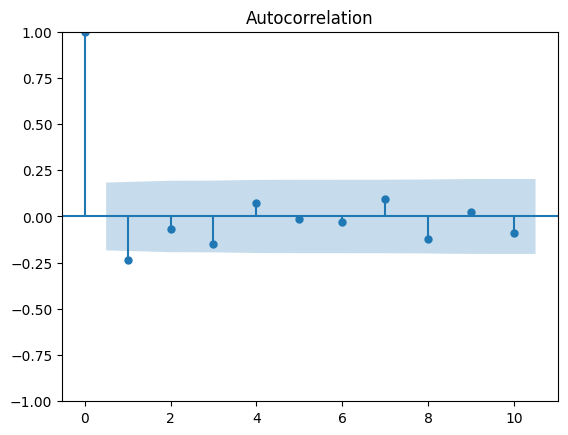

In [71]:
pacf_plot = plot_acf(store_df.demand_diff.dropna(),lags=10)

The ACF plot in Figure 8.10 shows no sign of slow reduction in autocorrelation over lags. It immediately cuts off to zero. We can build the model with first 100 observations as training set and subsequent observations as test set.

In [72]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [74]:
arima = ARIMA(store_train.demand.astype(np.float64),order = (1,1,1))
arima_model = arima.fit()
arima_model.summary()

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.910
Date:                Sat, 28 Oct 2023   AIC                            519.821
Time:                        16:44:39   BIC                            527.606
Sample:                    10-01-2014   HQIC                           522.971
                         - 01-08-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4091      0.311      1.315      0.189      -0.201       1.019
ma.L1         -0.7179      0.236     -3.039      0.002      -1.181      -0.255
sigma2        10.4865      1.026     10.223      0.000       8.476      12.497
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                75.18
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA model is a regression model and thus has to satisfy all the assumptions of regression. The residuals should be white noise and not correlated. This can be observed by using ACF and PACF plots of the residuals. The model residuals are given by arima_model.resid variable.

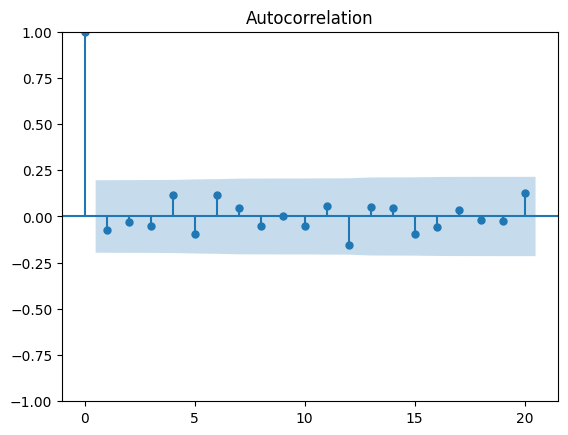

In [75]:
acf_plot = plot_acf(arima_model.resid,lags = 20)

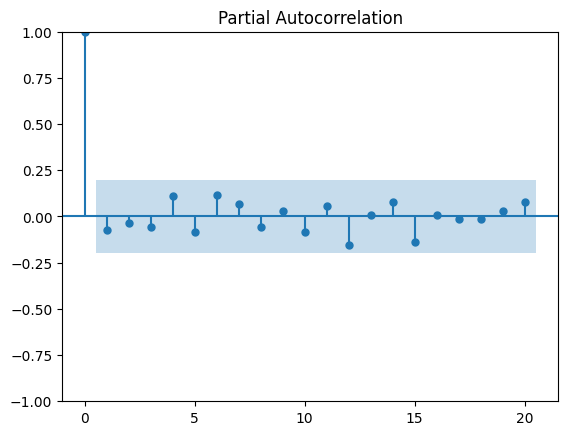

In [76]:
pacf_plot = plot_pacf(arima_model.resid,lags = 20)

The plots do not show any auto-correlation of residuals. So, the model can be
assumed to be valid.

The forecast() method takes the number of future periods (steps) for predicting values and returns the predicted values along with standard error and confidence interval of the predictions.

In [83]:
store_predict=arima_model.forecast(steps = 15)

In [84]:
get_mape(store_df.demand[100:],store_predict)

24.12